In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Cleaning and Preparation:

In [15]:
data = pd.read_csv("cardiotocographic.csv")
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [16]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(2126, 14)

In [6]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [7]:
# shows total records and total columns , check non null values, check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [8]:
# shows how mnay unique values are there
data.nunique()

LB           153
AC          1067
FM           776
UC          1364
DL           822
DS           114
DP           264
ASTV         183
MSTV         165
ALTV         195
MLTV         351
Width        261
Tendency     111
NSP          111
dtype: int64

In [9]:
# shows total null values each column
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [18]:
# shows duplicated records
data[data.duplicated(keep=False)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1113,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1457,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [19]:
# drop duplicate records
data.drop_duplicates(inplace =True)

In [21]:
# describe statistics about data
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2103.000000,2104.000000,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,133.342023,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280546,70.461052,0.316672,1.304797
std,11.268266,0.004392,0.067571,0.003340,0.003344,0.000142,0.000840,18.812403,1.174084,21.212676,7.774969,42.939806,0.645855,0.644857
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.000000
75%,140.000000,0.005650,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


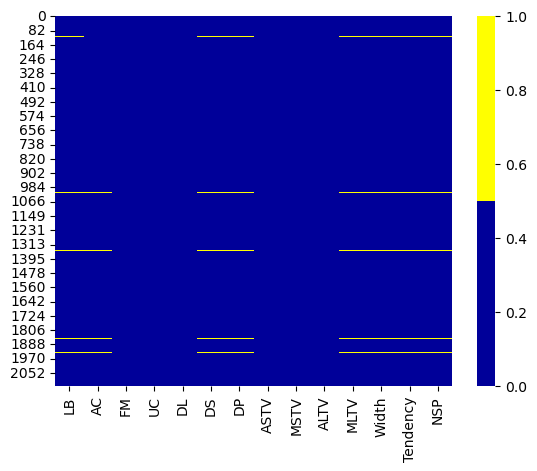

In [25]:
# specify the colours - yellow is missing. blue is not missing.
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
# heatmap for visualization
sns.heatmap(data.isnull(),
            cmap=pal)
plt.show()        # shows graphical view null records in columns

In [26]:
data.median() # shows median

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004486
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.486468
Tendency      0.000000
NSP           1.000000
dtype: float64

In [28]:
#Handle missing values appropriately
data.fillna(data.mean(),inplace = True) #fill null values with mean

# Detect and treat outliers if necessary

In [29]:
# Detecting outliers using Z-score
def detect_outliers_zscore(data):
    outliers = {}
    for column in data.select_dtypes(include=[np.number]).columns:
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        outliers[column] = data[np.abs(z_scores) > 3][column]
    return outliers

outliers_zscore = detect_outliers_zscore(data)
print("Outliers detected using Z-score method:\n", outliers_zscore)

Outliers detected using Z-score method:
 {'LB': 134      52.000000
411     214.000000
610     214.000000
612     214.000000
785      52.000000
1027     51.842487
1103    214.000000
1406    214.000000
1504    214.000000
1834     52.188547
Name: LB, dtype: float64, 'AC': 8       0.038567
23     -0.019284
116     0.038567
157    -0.019284
181     0.017241
529     0.019284
531     0.016423
626     0.038567
630     0.017391
681    -0.019284
1094    0.017668
1096    0.017341
1231    0.038567
1248    0.017857
1752   -0.019284
1859    0.017073
1918    0.038567
2060    0.038567
Name: AC, dtype: float64, 'FM': 13      0.222390
14      0.407840
15      0.380223
16      0.441400
17      0.382622
18      0.450925
19      0.469250
20      0.340045
21      0.425000
22      0.335121
229    -0.480634
408     0.961268
586    -0.480634
682     0.305755
683     0.299456
688     0.235489
689     0.407840
690     0.360417
691     0.455326
692     0.442724
693     0.470392
694     0.477204
695     0.445667
6

In [30]:
# Provide a statistical summary for each variable in the dataset,
#including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
def calculate_statistics(data):         
    stats_data = pd.DataFrame(columns=['Mean', 'Median', 'Standard Deviation', 'IQR']) # Create an empty DataFrame to store statistics
    
    for column in data.columns:                    # Loop through each column in the DataFrame
        mean = data[column].mean()
        median = data[column].median()
        std_dev = data[column].std()
        iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
        
        stats_data.loc[column] = [mean, median, std_dev, iqr]            # Append the statistics to the stats_df DataFrame
    
    return stats_data

# Calculate and display statistics
statistics_data = calculate_statistics(data)
statistics_data

,Mean,Median,Standard Deviation,IQR
LB,133.342023,133.000000,11.212396,14.000000
AC,0.003220,0.001668,0.004371,0.005612
FM,0.009904,0.000000,0.067571,0.002568
UC,0.004394,0.004486,0.003340,0.004678
DL,0.001897,0.000000,0.003344,0.003292
DS,0.000003,0.000000,0.000141,0.000000
DP,0.000175,0.000000,0.000836,0.000000
ASTV,47.012459,49.000000,18.812403,29.000000
MSTV,1.364345,1.200000,1.174084,1.000000
ALTV,10.295650,0.000000,21.212676,11.000000


# Data Visualization

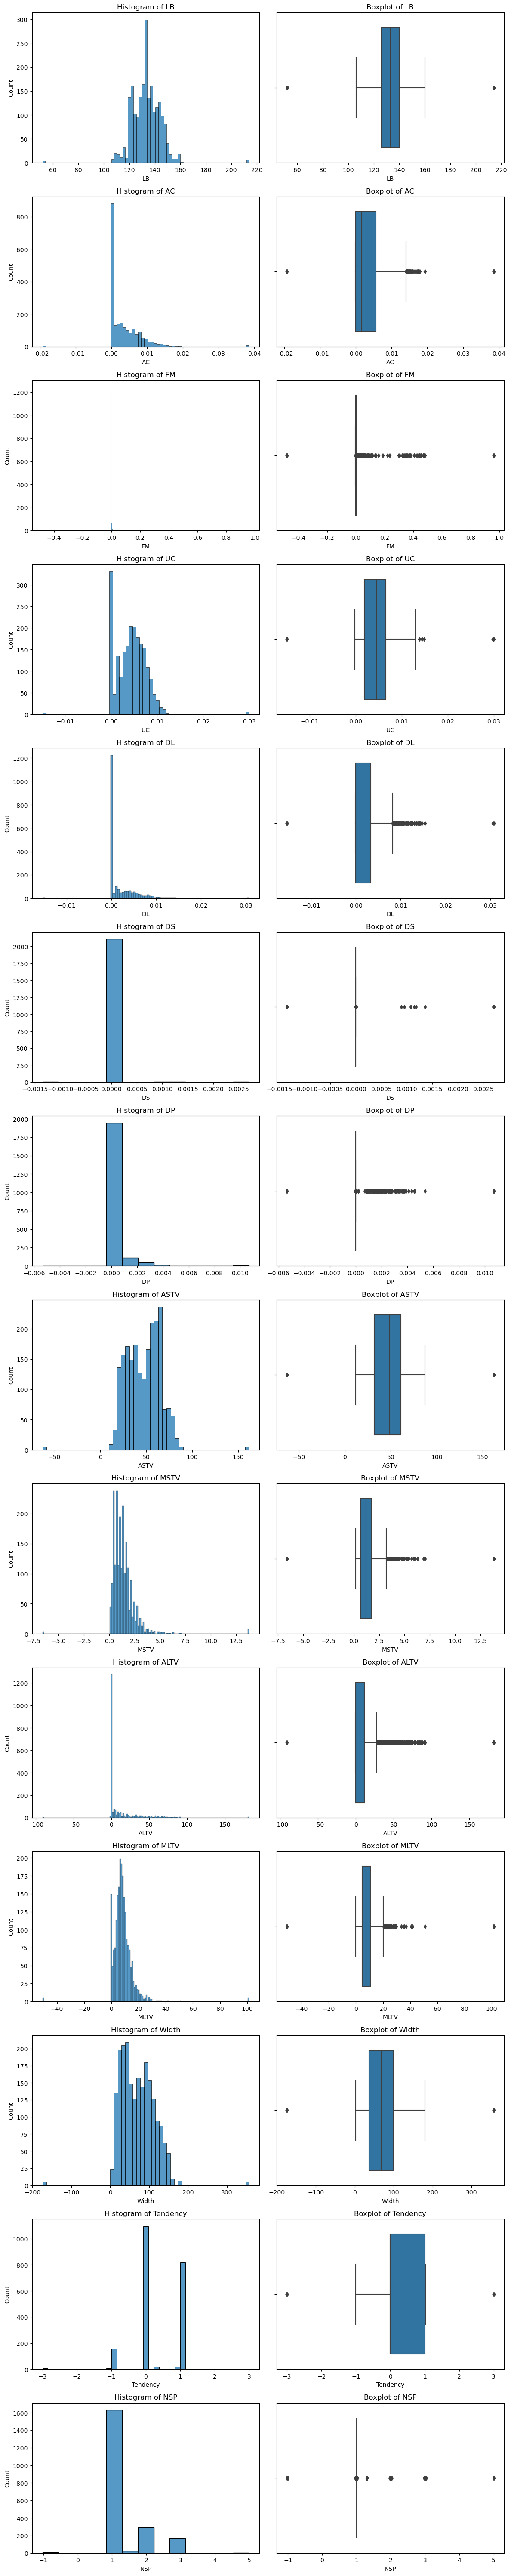

In [31]:
 import warnings
# Ignore specific future warnings
warnings.filterwarnings("ignore")

##Create histograms or boxplots to visualize the distributions of various numerical variables.

#subplots
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(12, 60))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create histograms and boxplots
for i, col in enumerate(data.columns):
    # Histogram
    sns.histplot(data[col], kde=False, ax=axes[i*2])
    axes[i*2].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(x=data[col], ax=axes[i*2+1])
    axes[i*2+1].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

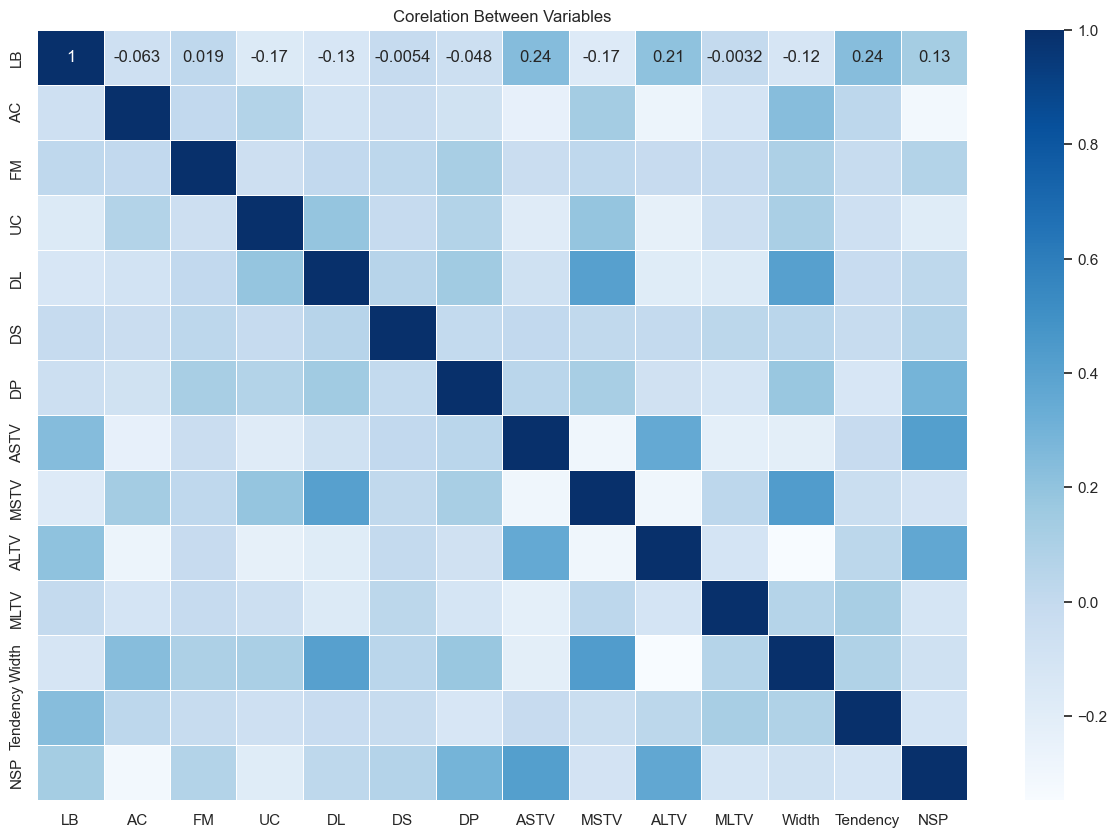

In [33]:
# correlation heatmaps to explore relationships between pairs of variables.
sns.set(style="white")
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(data.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title("Corelation Between Variables")
plt.show()

In [34]:
# correlation matrix
data.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063452,0.018809,-0.166642,-0.126557,-0.005439,-0.047726,0.241666,-0.169224,0.210673,-0.003225,-0.118375,0.237112,0.132008
AC,-0.063452,1.000000,0.009406,0.071552,-0.093330,-0.033109,-0.083330,-0.231058,0.133903,-0.271204,-0.104658,0.234720,0.031896,-0.312189
FM,0.018809,0.009406,1.000000,-0.053386,0.009641,0.029896,0.121248,-0.032838,0.017061,-0.012005,-0.006156,0.097125,-0.018408,0.073991
UC,-0.166642,0.071552,-0.053386,1.000000,0.189737,-0.006942,0.070348,-0.182379,0.189685,-0.227881,-0.048754,0.106550,-0.066949,-0.185542
DL,-0.126557,-0.093330,0.009641,0.189737,1.000000,0.058429,0.144853,-0.069907,0.410216,-0.187275,-0.164942,0.408427,-0.023759,0.025095
DS,-0.005439,-0.033109,0.029896,-0.006942,0.058429,1.000000,0.004282,0.008414,0.016079,-0.004400,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.083330,0.121248,0.070348,0.144853,0.004282,1.000000,0.037955,0.119270,-0.077760,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.241666,-0.231058,-0.032838,-0.182379,-0.069907,0.008414,0.037955,1.000000,-0.293820,0.357310,-0.219225,-0.207778,-0.011331,0.421175
MSTV,-0.169224,0.133903,0.017061,0.189685,0.410216,0.016079,0.119270,-0.293820,1.000000,-0.291979,0.028653,0.433232,-0.036652,-0.094634
ALTV,0.210673,-0.271204,-0.012005,-0.227881,-0.187275,-0.004400,-0.077760,0.357310,-0.291979,1.000000,-0.107331,-0.346496,0.036504,0.365218


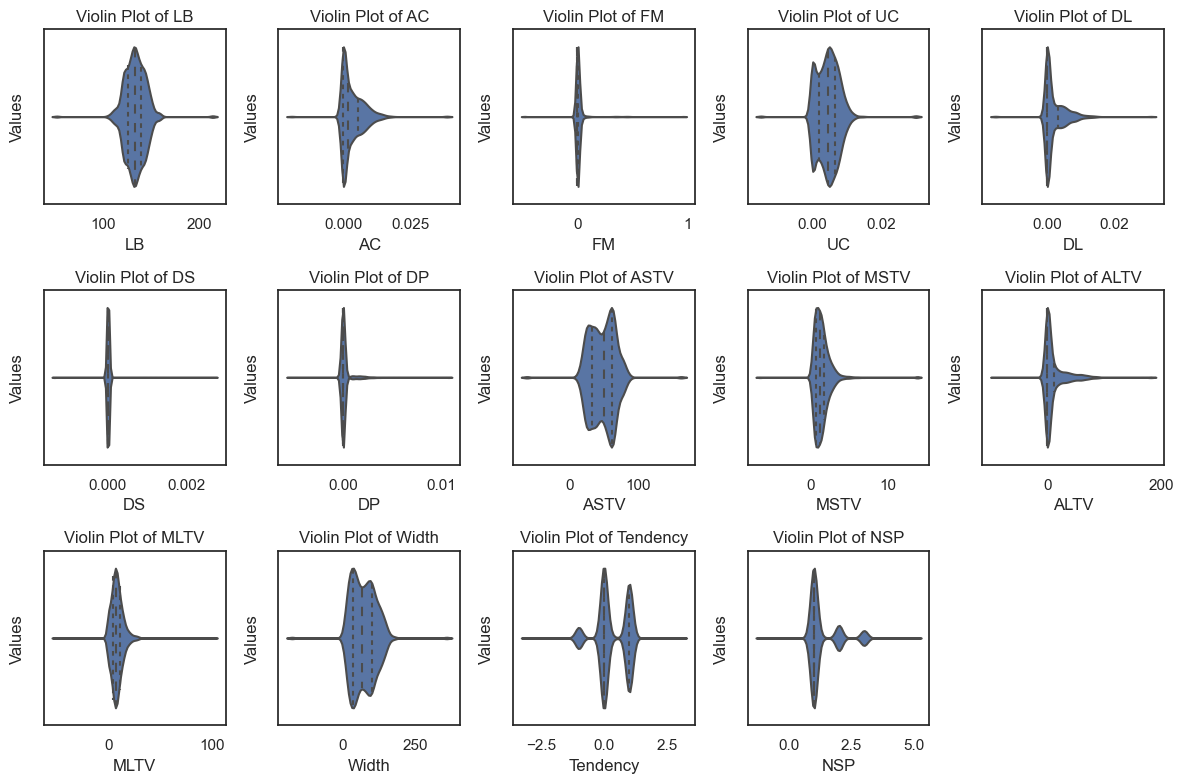

In [36]:
# Plotting  violin plots
plt.figure(figsize=(12, 8))

for i, col in enumerate(data.columns):
    plt.subplot(3, 5, i + 1)  # Adjust subplot grid as needed
    sns.violinplot(x=data[col], inner='quartile')
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [ ]:
correlations between variables and their potential implications.

Positive Correlations:
• LB  and ASTV       : A slight positive correlation of 0.24 suggests that as the fetal heart rate baseline increases, there tends to be an increase in                        abnormal short-term variability.
• LB and ALTV        : A slight positive correlation of 0.21 indicates that a higher FHR baseline is associated with more abnormal long-term                                   variability.
• Width  and MSTV    : A moderate positive correlation of 0.43 suggests that wider FHR histograms are associated with higher mean short-term                                   variability.
• ASTV and NSP       : A positive correlation of 0.48 indicates that a ASTV baseline is associated with NSP.
• Width and DL       : A positive Correlation of 0.40 indicates that a Width is associated with dL.

Negative Correlations:
• AC and ASTV        : A moderate negative correlation of -0.23 indicates that as accelerations per second increase, the percentage of time with                               abnormal short-term variability tends to decrease.
• AC and ALTV        : A negative correlation of -0.27 suggests that more accelerations per second are associated with less abnormal long-term                                 variability.
• Tendency and NSP   : A negative correlation of -0.11 indicates that as histogram differences increase (indicating more variability in baseline FHR),                         the fetal state class tends to decrease.

In [ ]:
Interpretation:

Lb       :     The mean and median values are quite close, indicating a symmetric distribution. The standard deviation is moderate, suggesting some                    variability around the mean. The IQR shows a moderate spread of the middle 50% of the data.
AC       :     The mean is slightly higher than the median, indicating a right-skewed distribution. The small standard deviation and IQR suggest low                   variability.
UC       :     The median is zero, indicating that more than half of the values are zero. The higher mean suggests a right-skewed distribution with                    some larger values. The high standard deviation indicates significant variability
DL       :    The median is zero, indicating many zero values. The mean is slightly higher, suggesting a right-skewed distribution. The standard                       deviation and IQR indicate moderate variability.
DS       :    Both mean and median are nearly zero, indicating that severe decelerations are rare. The standard deviation and IQR are very low, showing               minimal variability.
DP       :    The median is zero, indicating that prolonged decelerations are also rare. The mean is slightly higher, suggesting some presence.
              The standard deviation is low, indicating low variability.
ASTV     :    The mean and median are close, indicating a fairly symmetric distribution. The high standard deviation suggests significant variability,                with a considerable range in the middle 50% of the data.
MSTV     :    The mean is slightly higher than the median, indicating a slight right skew. The standard deviation is comparable to the mean, indicating                high variability.
ALTV     :     The median is zero, indicating many zero values. The high mean and standard deviation suggest a right-skewed distribution with                          significant variability.
MLT      :    The mean and median are close, indicating a symmetric distribution. The standard deviation is high, suggesting considerable variability.
Width    :    The mean is higher than the median, indicating a right-skewed distribution. The high standard deviation and IQR indicate significant                    variability.
Tendency :    The median is zero, indicating that many values are zero. The mean is higher, suggesting a right-skewed distribution with some larger                   values. The standard deviation and IQR indicate moderate variability.
NSP      :    The mean and median are close, indicating a symmetric distribution. The low IQR suggests a tight middle range, but the standard                         deviation indicates some variability.

Interpretation Highlights:
LB (Long-term Variability):
The mean (133.34) and median (133.00) are close, indicating a symmetric distribution.
The moderate standard deviation (11.21) suggests some variability around the mean.

AC (Accelerations):
The mean (0.0032) is slightly higher than the median (0.0017), indicating a right-skewed distribution.
The small standard deviation (0.0044) and IQR (0.0056) indicate low variability.

FM (Fetal Movements):
The median is zero, suggesting many zero values.
The higher mean (0.0099) and standard deviation (0.0676) indicate a right-skewed distribution with significant variability.
UC (Uterine Contractions):
The mean (0.0044) and median (0.0045) are very close, indicating a symmetric distribution.
The low standard deviation (0.0033) and IQR (0.0047) indicate low variability.

DL (Light Decelerations) & DS (Severe Decelerations):
Both columns have a median of zero, suggesting many zero values.
Low standard deviations and IQRs indicate minimal variability.

ASTV (Average Short-term Variability):
The mean (47.01) and median (49.00) are close, suggesting a fairly symmetric distribution.
The high standard deviation (18.81) suggests significant variability.

ALTV (Average Long-term Variability):
The median is zero, indicating many zero values.
The high mean (10.29) and standard deviation (21.21) suggest a right-skewed distribution with significant variability.

MLT (Mean Long-term Variability):
The mean (8.28) and median (7.50) are close, indicating a symmetric distribution.
The high standard deviation (7.73) suggests considerable variability.

Width:
The mean (70.46) is higher than the median (68.00), indicating a right-skewed distribution.
The high standard deviation (42.73) and IQR (63.00) indicate significant variability.

Tendency:
The median is zero, suggesting many zero values.
The mean (0.3167) is higher, indicating a right-skewed distribution with moderate variability.

NSP (Fetal State):
The mean (1.3048) and median (1.00) are close, indicating a symmetric distribution.
The low IQR (0.00) suggests a tight middle range, but the standard deviation (0.6417) indicates some variability.